## Observations and Insights 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [30]:
mouse_metadata.head(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17


In [31]:
study_results.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [133]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview

combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())
num_mice

249

In [135]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. combined_data.drop_duplicates(['Mouse ID','Timepoint'])
duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Optional: Get all the data for the duplicate mouse ID.


In [132]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data.drop_duplicates(subset=["Mouse ID","Timepoint"],keep ='first')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [58]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = len(combined_data["Mouse ID"].unique())
num_mice_cleaned

249

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mean = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

stdv = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean': mean,
                          'Median': median,
                          'Variance': variance,
                          'Standard Dev.': stdv,
                          'SEM': SEM})


summary_df



,Mean,Median,Variance,Standard Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [82]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


In [137]:
#create new data frame & remove duplicates for Mouse ID and Drug Regiment

clean_df = combined_data.drop_duplicates(subset=["Mouse ID","Drug Regimen","Timepoint"],keep ='first')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


Text(0, 0.5, 'Number of mice tested')

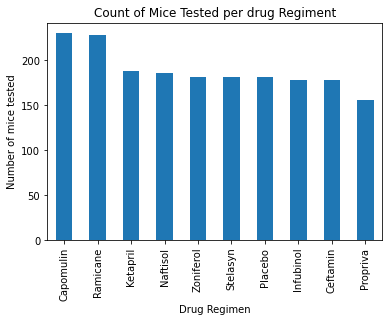

In [138]:
barplt = pd.value_counts(clean_df['Drug Regimen'])
barplt.plot(kind='bar')
plt.title("Count of Mice Tested per drug Regiment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice tested")

In [90]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



<AxesSubplot:ylabel='None'>

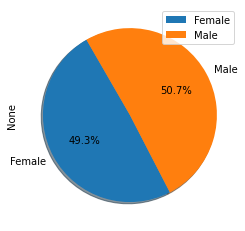

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

clean_df.groupby('Sex').size().plot(kind='pie', legend=True, autopct="%1.1f%%", shadow = True, startangle=3000 )


In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [264]:

print (clean_df['Timepoint'].iloc[-1])

45


In [311]:
#greatest timepoint for each mouse
mouse_df = combined_data.groupby('Mouse ID')
time_df = mouse_df['Timepoint'].max()
time_df

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [312]:
merged_df = pd.merge(clean_df, time_df, how="left", on=["Mouse ID", "Mouse ID"])
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


TypeError: 'DataFrame' object is not callable

In [297]:
tumor_df = clean_df.loc[(clean_df.Timepoint == 45)]
tumor_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [275]:
# create table for each of the four drug regimne by mouse ID.  

#Capomulin_tumor_vol_byID = tumor_df[tumor_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)']
#Ramicane_tumor_vol_byID = tumor_df[tumor_df['Drug Regimen']=='Ramicane'].groupby('Mouse ID')['Tumor Volume (mm3)']
#Infubinol_tumor_vol_byID = tumor_df[tumor_df['Drug Regimen']=='Infubinol'].groupby('Mouse ID')['Tumor Volume (mm3)']
#Ceftamin_tumor_vol_byID = tumor_df[tumor_df['Drug Regimen']=='Ceftamin'].groupby('Mouse ID')['Tumor Volume (mm3)']

In [277]:
#summary_data = {'Capomulin': Capomulin_tumor_vol_byID,
             # 'Ramicane': Ramicane_tumor_vol_byID,
             # 'Infubinol': Infubinol_tumor_vol_byID,
             # 'Ceftamin': Ceftamin_tumor_vol_byID}
#summary_data_df = pd.DataFrame(summary_data)
#summary_data_df = summary_data_df[['Capomulin',
                                 # 'Ramicane',
                                 # 'Infubinol',
                                 # 'Ceftamin']]

#summary_data_df

In [281]:
# only include the 4 drug regimentdrug regimen

Cap_drug_by_ID = tumor_df[tumor_df['Drug Regimen']== str("Capomulin")]
Cap_drug_by_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2
224,w914,Capomulin,Male,24,21,45,36.041047,2


In [237]:
Reg_drug_by_ID = tumor_df[tumor_df['Drug Regimen']== str("Ramicane")]
Reg_drug_by_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1
114,n364,Ramicane,Male,4,17,45,31.095335,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
174,a644,Ramicane,Female,7,17,45,32.978522,1
184,i177,Ramicane,Male,10,18,45,33.562402,3


In [238]:
Inf_drug_by_ID = tumor_df[tumor_df['Drug Regimen']== str("Infubinol")]
Inf_drug_by_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2
800,e476,Infubinol,Male,23,26,45,62.435404,1
834,f345,Infubinol,Male,23,26,45,60.918767,1
1053,k483,Infubinol,Female,20,30,45,66.196912,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3


In [239]:
#drug_by_ID = tumor_df[tumor_df['Drug Regimen']== str("Capomulin" or "Ramicane" or "Infubinol" or "Ceftamin" )]
Cef_drug_by_ID = tumor_df[tumor_df['Drug Regimen']== str("Ceftamin")]
Cef_drug_by_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1260,o287,Ceftamin,Male,2,28,45,59.741901,4
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3


In [191]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = []

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
